# Question 3B: Eulers Forward  and Backwards Methods

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = (3x^2 + 1)y^2 $$ 

Initial Condition $ y(0) = -1 $

Boundary $ 0 \le x \le 10 $

Step Size $ h = 0.1 $

Actual Solution $ y(x) = -(x^3 + x +1)^{-1} $





In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [2]:
def myfun_xy(x,y):
    return ((3*x**2 + 1)*y**2)


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 10 $.
### Interval
The step Size will be $h = 0.1$

with the discrete time steps,
$$ x_{i} = 0 + i0.1 $$
for  $i=0,1,...,100$.

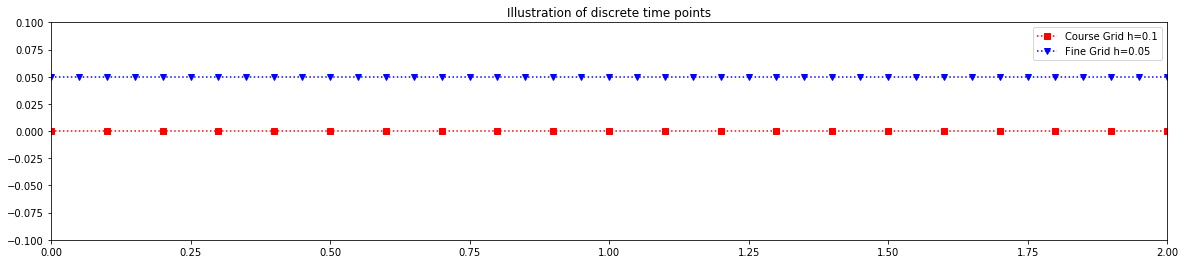

In [3]:
# Start and end of interval
b=10
a=0
# Steps N1=100
N1=100
N2=200
h1=0.1
h2=0.05

x1=np.arange(a,b+h1,h1)
x2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Course Grid h=%s'%(h1))
plt.plot(x2,0*x2+.05,'v:',color='blue',label='Fine Grid h=%s'%(h2))

plt.xlim((0,2))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

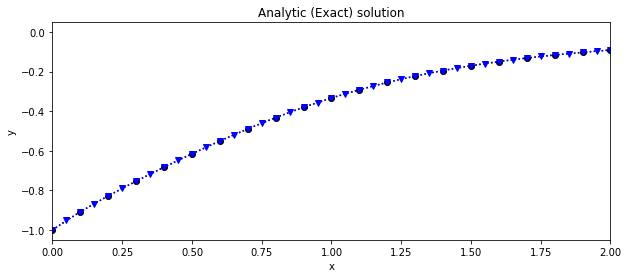

In [4]:
## Analytic Solution y
y1= -((x1**3 + x1 +1)**(-1))
y2= -((x2**3 + x2 +1)**(-1))

fig = plt.figure(figsize=(10,4))
plt.plot(x1,y1,'o:',color='black')
plt.plot(x2,y2,'v:',color='blue')
plt.xlim((0,2))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 2 $$

In [7]:
IC=-1 # Intial condtion
w1 = np.zeros(N1+1)
v1 = np.zeros(N1+1)
v1bar = np.zeros(N1+1)
w1[0]=IC
v1bar[0]=IC
v1[0]=IC

w2 = np.zeros(N2+1)
v2 = np.zeros(N2+1)
v2bar = np.zeros(N2+1)
w2[0]=IC
v2bar[0]=IC
v2[0]=IC

## Forward Euler
Assuming uniform stepsize  $x_{i+1} − x_{i}$ is replaced by  h, re-arranging the equation gives:
$$ w_{i+1} = w_{i} + hf(x_{i}, w_{i}) $$

This can be read as the future  $w_{i+1} $ can be approximated by the present  $w_{i}$ and the addition of the input to the system  $f(x,y)$ times the time step.

## Backward Euler
Backwards Euler is an implicit method
$$ vbar_{i+1} = v_{i} + hf(x_{i}, v_{i}) $$
$$ v_{i+1} = v_{i} + hf(x_{i+1}, vbar_{i+1}) $$


Text(0.5, 1.0, 'Analytic and Euler solution')

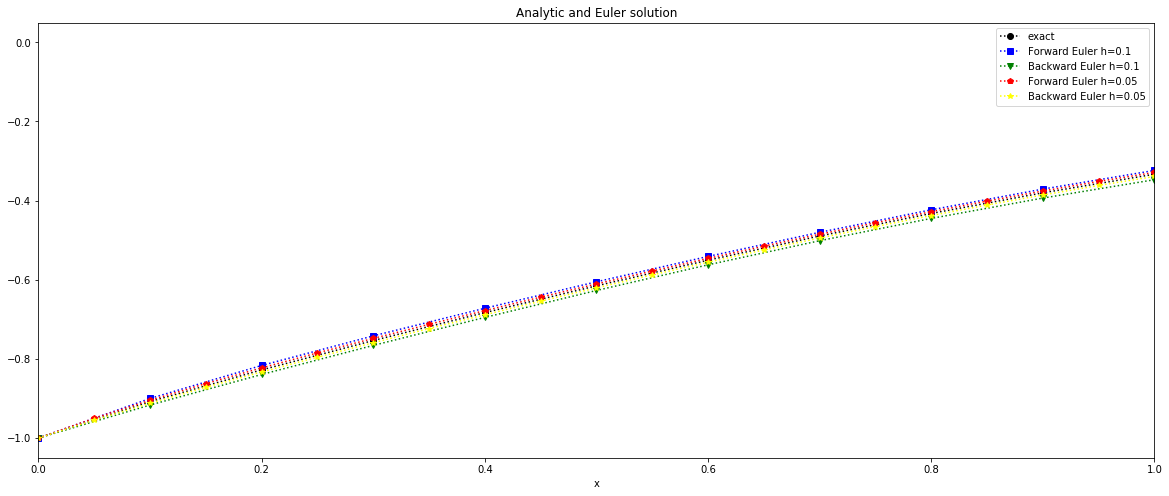

In [8]:

for i in range (0,N1):
    w1[i+1]=w1[i]+h1*myfun_xy(x1[i], w1[i])
    v1bar[i+1]=v1[i]+h1*myfun_xy(x1[i], v1[i])
    v1[i+1]=v1[i]+h1*myfun_xy(x1[i+1], v1bar[i+1])

for i in range (0,N2):
    w2[i+1]=w2[i]+h2*myfun_xy(x2[i], w2[i])
    v2bar[i+1]=v2[i]+h2*myfun_xy(x2[i], v2[i])
    v2[i+1]=v2[i]+h2*myfun_xy(x2[i+1], v2bar[i+1])
    

fig = plt.figure(figsize=(20,8))
plt.plot(x1,y1,'o:',color='black',label='exact')
plt.plot(x1,w1,'s:',color='blue',label='Forward Euler h=0.1')
plt.plot(x1,v1,'v:',color='green',label='Backward Euler h=0.1')
plt.plot(x2,w2,'p:',color='red',label='Forward Euler h=0.05')
plt.plot(x2,v2,'*:',color='yellow',label='Backward Euler h=0.05')
plt.xlim((0,1))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and Euler solution')

In [9]:
table = ListTable()
table.append(['x', 'w1 FE h=0.1', 'v1 BE h=0.1', 'Exact',
              'FE Err 0.1', 'BE Err 0.1', '% Err FE 0.1', '% Err BE 0.1'])
tableSize = 10
for i in range (0,tableSize+1):
    table.append([round(x1[i],3), round(w1[i],3), round(v1[i],3), round(y1[i],3),
                  round(abs(y1[i]-w1[i]),5), round(abs(y1[i]-v1[i]),5),
                 round(abs(y1[i]-w1[i])/abs(y1[i])*100,5), round(abs(y1[i]-v1[i])/abs(y1[i])*100,5)])
    
table.append(['Max',' ' ,' ' 
              , ' ', round(max(abs(y1-w1)),5), round(max(abs(y1-v1)),5)])
table

x,w1 FE h=0.1,v1 BE h=0.1,Exact,FE Err 0.1,BE Err 0.1,% Err FE 0.1,% Err BE 0.1
0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0
0.1,-0.9,-0.917,-0.908,0.00827,0.0083,0.91,0.91436
0.2,-0.817,-0.839,-0.828,0.01124,0.01159,1.35834,1.40022
0.3,-0.742,-0.766,-0.754,0.01169,0.01238,1.55121,1.64235
0.4,-0.672,-0.695,-0.683,0.01107,0.01214,1.62081,1.7769
0.5,-0.605,-0.627,-0.615,0.01023,0.01174,1.66202,1.90844
0.6,-0.541,-0.562,-0.551,0.00959,0.01163,1.74183,2.11273
0.7,-0.48,-0.501,-0.489,0.0093,0.01192,1.90005,2.43578
0.8,-0.423,-0.445,-0.433,0.0093,0.01252,2.15028,2.89478
0.9,-0.371,-0.394,-0.38,0.00945,0.01325,2.48448,3.48264


In [10]:
table2 = ListTable()
table2.append(['x', 'w1 FE h=0.05', 'v1 BE h=0.05', 'Exact',
              'FE Err 0.05', 'BE Err 0.05', '% Err FE 0.05', '% Err BE 0.05'])
tableSize = 10
for i in range (0,tableSize+1):
    table2.append([round(x2[i],3), round(w2[i],3), round(v2[i],3), round(y2[i],3),
                  round(abs(y2[i]-w2[i]),5), round(abs(y2[i]-v2[i]),5),
                 round(abs(y2[i]-w2[i])/abs(y2[i])*100,5), round(abs(y2[i]-v2[i])/abs(y2[i])*100,5)])
    
table2.append(['Max',' ' ,' ' 
              , ' ', round(max(abs(y2-w2)),5), round(max(abs(y2-v2)),5)])
table2

x,w1 FE h=0.05,v1 BE h=0.05,Exact,FE Err 0.05,BE Err 0.05,% Err FE 0.05,% Err BE 0.05
0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0
0.05,-0.95,-0.955,-0.952,0.00227,0.00227,0.23813,0.23827
0.1,-0.905,-0.912,-0.908,0.00373,0.00375,0.41052,0.41307
0.15,-0.862,-0.872,-0.867,0.00462,0.00467,0.53294,0.53895
0.2,-0.823,-0.833,-0.828,0.00511,0.00519,0.61746,0.62753
0.25,-0.785,-0.796,-0.79,0.00532,0.00544,0.67374,0.68845
0.3,-0.748,-0.759,-0.754,0.00535,0.0055,0.70983,0.72989
0.35,-0.713,-0.723,-0.718,0.00526,0.00545,0.73259,0.75898
0.4,-0.678,-0.688,-0.683,0.00511,0.00534,0.74791,0.7819
0.45,-0.644,-0.654,-0.649,0.00494,0.00522,0.76084,0.80397
